# Markov Chains
## Markov processes
$$
X_t\in\mathbb R^n \text{ for example}
$$
$$
F(X_t | \{X_0,x_1,...,X_{t-1}\}) = F(X_{t} | X_{t-1})
$$

## The future will be like the past

$$
X_t = \beta E_t(Y_{t+1})
$$
$X$ may be be current economic activity, $Y$ may be future inflation

$$
Y_t = \gamma X_t + u_t
$$
Suppose that $(X_t,u_t)$ are Markov
$$
F(X_t, u_t|X_{t-1}, u_{t-1})
$$
then
$$
E_t(Y_{t+1}) = g(X_t, u_t)
$$
and
$$
X_t = \beta g(X_t, u_t).
$$
Hopefully,
$$
X_t = h(u_t).
$$


### Stochastic DEs are Markov processes
$$
x_t = Ax_{t-1} + B w_{t}
$$
$$
F(x_t | t-1) = 
F(Ax_{t-1} + B w_{t} | t-1) 
= F(Ax_{t-1} + B w_{t} | x_{t-1})
$$
## Markov chains
Suppose
$$
S_t \in 1, 2, 3, ..., N.
$$
For example, $s=1$ for employment and $s=2$ for unemployment.

$w_t \sim F()$ maybe even a density function $f(w_t)$

### Probability mass function (PMF)
$$
\pi_n \equiv
\Pr(S = n)
$$
$0 \le \pi_n \le 1$ and $\sum_{i=1}^N \pi_n = 1$.


In [61]:
using Random

Uniform distributed [0,1)

In [65]:
u = rand()

0.7508036602275083

In [97]:
pmf = [0.25, 0.5, 0.25]

3-element Array{Float64,1}:
 0.25
 0.5
 0.25

In [98]:
CDF = cumsum(pmf, dims=1)

3-element Array{Float64,1}:
 0.25
 0.75
 1.0

In [109]:
sum(rand() .>= CDF) + 1

1

In [102]:
u = rand()

0.1891952774570116

In [68]:
sum(pmf, dims=1)

1-element Array{Float64,1}:
 1.0

In [110]:
function draw_random_state(pmf::Vector{Float64})
    prob = pmf ./ sum(pmf, dims=1)
    CDF = cumsum(prob, dims=1)
    u = rand() # this is uniform random [0,1)
    return sum(u .>= CDF) + 1
end

draw_random_state (generic function with 1 method)

In [69]:
pmf = [1, 2, 3]
pmf ./ sum(pmf, dims=1)

3-element Array{Float64,1}:
 0.16666666666666666
 0.3333333333333333
 0.5

In [70]:
A = [1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [76]:
sum(A)

21

In [73]:
sum(A, dims=1)

1×3 Array{Int64,2}:
 5  7  9

In [75]:
sum(A, dims=(1,2))

1×1 Array{Int64,2}:
 21

In [83]:
A

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [81]:
b = [0 7; 0 8][:, 2:2]

2×1 Array{Int64,2}:
 7
 8

In [82]:
A .+ b

2×3 Array{Int64,2}:
  8   9  10
 12  13  14

In [84]:
c = [7;8]

2-element Array{Int64,1}:
 7
 8

In [85]:
A .+ c

2×3 Array{Int64,2}:
  8   9  10
 12  13  14

In [86]:
d = [0 7; 0 8]

2×2 Array{Int64,2}:
 0  7
 0  8

In [87]:
A .+ d

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 3 and 2")

In [91]:
maximum(A, dims=2)

2×1 Array{Int64,2}:
 3
 6

In [92]:
A .- maximum(A, dims=2)

2×3 Array{Int64,2}:
 -2  -1  0
 -2  -1  0

In [114]:
function test_randomizer(pmf::Vector{Float64})
    S = zeros(10000)
    for n = 1:length(S)
        S[n] = draw_random_state(pmf)
    end
    histogram(S)
end

test_randomizer (generic function with 1 method)

In [112]:
using Plots

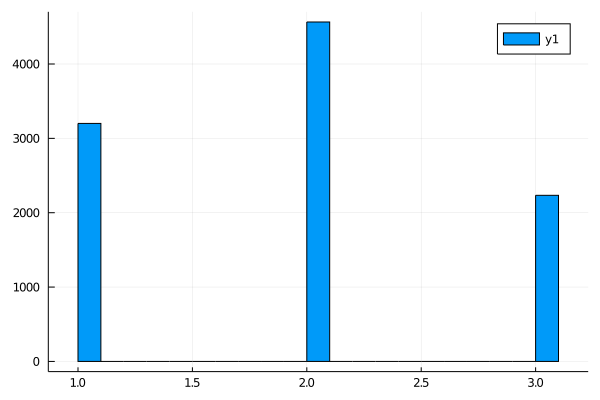

In [116]:
test_randomizer([0.35, 0.5, 0.25])

## Markov chains
If $S$ is Markovian,
$$
\Pr(S_t=n | t-1) =
\Pr(S_t=n | S_{t-1}=s) = P_{sn}
$$
$N^2$ (conditional) probabilities,
$$
0 \le P_{sn}\le 1
$$
$$
\sum_{n=1}^N P_{sn} = 1
\text{ for all }s
$$
**Transition matrix**:
$$
\mathbf P = 
\begin{bmatrix}
P_{11} & P_{12} & ...\\
P_{21} & P_{22} & ...\\
...
\end{bmatrix}
$$
$$
0 .\le \mathbf P .\le 1 \tag{*}
$$
$$
\mathbf P \mathbf 1 = \mathbf 1
\tag{**}
$$
(\*) and (\*\*) mean *stochastic matrix*.
$$
(\mathbf P - 1\mathbf I)\mathbf 1 = \mathbf 0
$$
$$
1 \in \text{eig}(\mathbf P)
$$
### Forecasting
Take a transition matrix $P$. If $S_0=1$,
$$
\Pr(S_1 =n | S_0 = 1) = P_{1n}.
$$
for two periods
$$
\Pr(S_2 = n | S_0 = 1) =
\sum_{s=1}^N
\Pr(S_2 = n | S_1 = s)
\Pr(S_1 = s | S_0 = 1)
$$
$$
=\sum_{s=1}^N P_{sn} P_{1s}
$$

$$
\mathbf P =
\begin{bmatrix}
... & P_{1n} & ... \\
... & P_{2n} & ... \\
...
\end{bmatrix}
$$
$$
\mathbf P =
\begin{bmatrix}
P_{11} & ... & P_{1N} \\
... & ... & ... \\
...
\end{bmatrix}
$$
$$
[\mathbf P \mathbf P]_{1n} =
\mathbf P_{1.}\mathbf P_{.n} = 
\sum_{s=1}^N P_{sn} P_{1s}
$$
$$
\pi_2 =  [\mathbf P^2]_{1.} = \mathbf e_1\mathbf P^2
$$
$$
\pi_t = \mathbf e_1\mathbf P^t
$$

$$
\pi_t = \pi_{t-1} \mathbf P \tag{TRE}
$$
$$
\pi_t = \pi_0 \mathbf P^t \tag{MCF}
$$
$$=
\sum_{i=1}^N
\pi_{i0}\mathbf e_i \mathbf P^t
$$
$$
\sum_{i=1}^N
\pi_{i0}\mathbf e_i = \pi_0
$$


In [4]:
P = [0.9 0.1; 0.4 0.6]

2×2 Array{Float64,2}:
 0.9  0.1
 0.4  0.6

In [118]:
sum(P, dims=2)

2×1 Array{Float64,2}:
 1.0
 1.0

In [121]:
function simulate_markov_chain!(S::Vector{Int64}, P::Array{Float64, 2})
    T = length(S)
    for t = 2:T
        S[t] = draw_random_state(P[S[t-1], :])
    end
end

simulate_markov_chain! (generic function with 1 method)

In [120]:
P[1,:]

2-element Array{Float64,1}:
 0.9
 0.1

In [132]:
P

2×2 Array{Float64,2}:
 0.9  0.1
 0.4  0.6

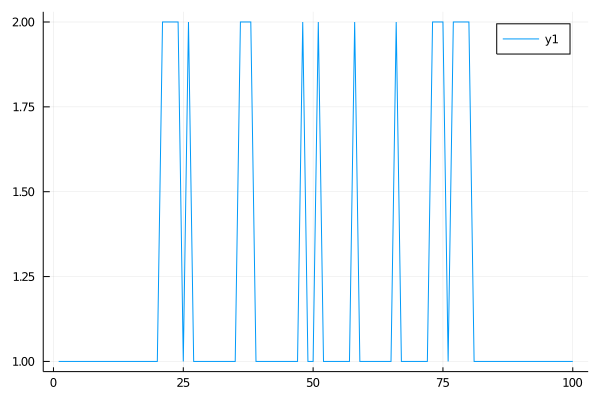

In [136]:
S = ones(Int64, 100) 
simulate_markov_chain!(S, P)
plot(S)

### Stability properties
Using (TRE)
$$
\pi_* = \pi_* \mathbf P.
$$
$\pi_*$ is the **stationary distribution** of P. Because $P$ has eig(1), there always exists at least one $\pi_*$.

Using (MCF)
$$
\pi_\infty(\pi_0) = \lim_{t\to\infty} \pi_0
\mathbf P^t
$$

$$
\pi_*(\mathbf I-\mathbf P) = \mathbf 0
$$
$$
(\mathbf I-\mathbf P')\pi_*' = \mathbf 0
$$
The column vector $\pi_*'$ is an eigenvector of $\mathbf P'$, with corresponding eigenvalue of 1.

If 
$$
\pi_\infty(\pi_0) = \pi_*
$$
for all $\pi_0$ then P is **asymptotic stationary**.  Is it sufficent if $\pi_*$ is unique?

## Asymptotic stationarity
### Some sufficient conditions
1. $P_{sn}>0$ for all $s$, $n$
2. $[\mathbf P^t]_{sn}>0$ for all $s$, $n$ for some $t$


### Eigenvector recap
$$
(\lambda \mathbf I - \mathbf A)\mathbf v = \mathbf 0
$$
If $\mathbf v$ is an eigenvector, then so is $\mu \mathbf v$. 

If $\mathbf v_1$ and $\mathbf v_2$ are both eigenvectors with the same eigenvalue, then so is $\mu_1\mathbf v_1 + \mu_2 \mathbf v_2$. Not if their eigenvalues are different. 

$$
(\lambda_i \mathbf I - \mathbf A)\mathbf v_i = \mathbf 0
$$

$N\times N$ matrix has $N$ eigenvalues, not all may be distinct.

$$
\text{eig}(\mathbf A) = 
\text{eig}(\mathbf A')
$$


In [14]:
function forecast_markov_chain!(pmf::Array{Float64, 2}, P::Array{Float64, 2})
    N, T = size(pmf)
    # so that pmf[:,t] is a column vector, as usual in Julia
    # note that we need pmf' to premultiply P
    
    for t = 2:T
        # Julia kindly copies a row vector into a column vector
        pmf[:, t] = pmf[:, t-1]' * P
    end
end

forecast_markov_chain! (generic function with 1 method)

In [15]:
using Plots

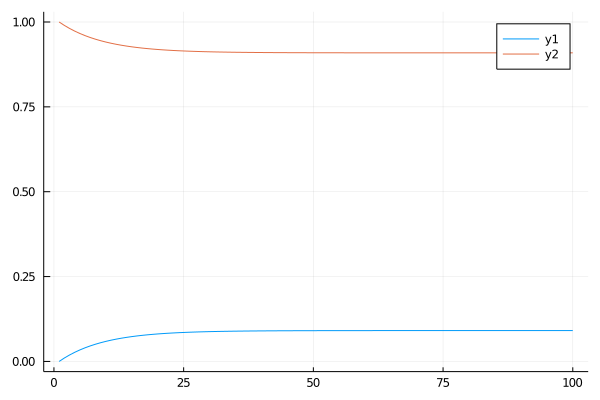

In [18]:
P = [0.9 0.1; 0.01 0.99]
pmf = zeros(2, 100)
pmf[2, 1] = 1.0
forecast_markov_chain!(pmf, P)
plot(pmf')

In [19]:
eigen(P')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.89
 1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  -0.0995037
  0.707107  -0.995037

In [5]:
P

2×2 Array{Float64,2}:
 0.9  0.1
 0.4  0.6

## Eigenvalues

In [11]:
using LinearAlgebra

In [13]:
eigen(P')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.5
 1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  0.970143
  0.707107  0.242536

In [21]:
e = eigen([0.9 0; 0 0.4])

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.4
 0.9
vectors:
2×2 Array{Float64,2}:
 0.0  1.0
 1.0  0.0

In [17]:
e.values

2-element Array{Float64,1}:
 1.0
 1.0

In [18]:
e.vectors

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [22]:
P

2×2 Array{Float64,2}:
 0.9  0.1
 0.4  0.6

In [23]:
e = eigen(P')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.5
 1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  0.970143
  0.707107  0.242536

In [28]:
pi_star = e.vectors[:,2] ./ sum(e.vectors[:, 2])

2-element Array{Float64,1}:
 0.7999999999999999
 0.19999999999999998

In [31]:
pi_star' == pi_star' * P 

true

In [35]:
eigen(P).values == eigen(P').values

true

In [1]:
P = [0 1; 1 0]

2×2 Array{Int64,2}:
 0  1
 1  0

In [3]:
using LinearAlgebra
eigen(P')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 -1.0
  1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

In [11]:
[1.0 0.0] * P^368

1×2 Array{Float64,2}:
 1.0  0.0

In [38]:
P = [1 0; 0 1]

2×2 Array{Int64,2}:
 1  0
 0  1

In [40]:
eig = eigen(P')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 1.0
 1.0
vectors:
2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [41]:
pi_star1 = eig.vectors[:,1]
pi_star2 = eig.vectors[:,2]

2-element Array{Float64,1}:
 0.0
 1.0

In [45]:
pi = (0.2 * pi_star1 + 0.8 * pi_star2)'
pi == pi * P

true

In [12]:
P = [0.9 0.1; 0.4 0.6]
pi_star = eigen(P').vectors[:, 2] ./ sum(eigen(P').vectors[:, 2])

2-element Array{Float64,1}:
 0.7999999999999999
 0.19999999999999998

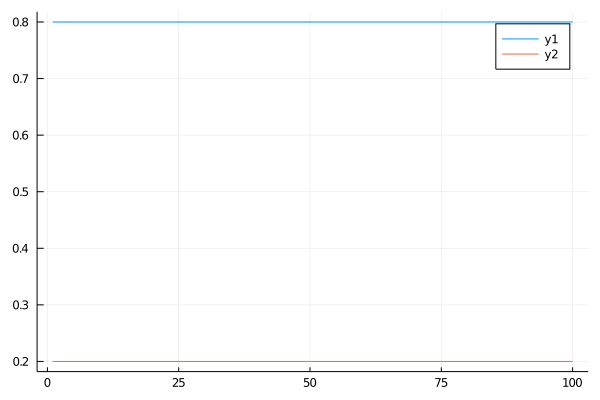

In [47]:
pmf = zeros(2, 100)
pmf[:, 1] = pi_star
forecast_markov_chain!(pmf, P)
plot(pmf')

In [51]:
P1 = [0.6 0.4; 1.0 0.0]

2×2 Array{Float64,2}:
 0.6  0.4
 1.0  0.0

In [52]:
eigen(P1')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 -0.4
  1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  0.928477
  0.707107  0.371391

In [53]:
P2 = P1 * P1

2×2 Array{Float64,2}:
 0.76  0.24
 0.6   0.4

In [54]:
P

2×2 Array{Float64,2}:
 0.9  0.1
 0.4  0.6

In [56]:
eigen(P')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.5
 1.0
vectors:
2×2 Array{Float64,2}:
 -0.707107  0.970143
  0.707107  0.242536

### The role of other eigenvalues
For $a\neq 0$ such that
$$
\pi = \pi_* + a \mathbf v_2
$$
is a pmf,
$$
\pi \mathbf P = 
\pi_*\mathbf P + a \mathbf v_2 \mathbf P =
\pi_* +\lambda_2 a\mathbf v_2
$$

In [62]:
a = -0.2
pi_star + a * eigen(P').vectors[:,1]

2-element Array{Float64,1}:
 0.9414213562373095
 0.05857864376269048

A $1\times N$ vector can be written as linear comb of $N$ eigenvalues.

Eigenvalues
$$
\mathbf P^t
$$
whenever 
$$
\mathbf P = \mathbf V
\mathbf \Lambda 
\mathbf V^{-1}
$$
$$
\mathbf P^t
= \mathbf V
\mathbf \Lambda^t 
\mathbf V^{-1}
$$
$$
\mathbf \Lambda ^t =
\begin{bmatrix}
\lambda_1^t & 0 & 0 \\
0 & \lambda_2^t & 0\\
...
\end{bmatrix}
$$

Generally
$$
\pi_0 = \sum_{i=1}^N
a_i\mathbf v_{i}
$$
$\pi_0 \mathbf 1=1$
for $\lambda_1=1$
$$
a_1 = 1
$$
$$
\pi_t = \pi_0 \mathbf P^t
= \pi_0 \mathbf V
\mathbf \Lambda^t 
\mathbf V^{-1}
$$
...
### For $N=2$
$$
\pi_0 = \pi_* + a \mathbf v_2
$$
$$
\pi_1 = \pi_0 \mathbf P 
= (\pi_* + a \mathbf v_2) \mathbf P
= \pi_* + a \mathbf v_2 \lambda_2
$$
...
$$
\pi_t = \pi_* + a \mathbf v_2 \lambda_2^t
$$
whenever $|\lambda_2|<1$, we have asymptotic stationarity
### For $N>2$
$$
\pi_t = \pi_* +a_2\mathbf v_2\lambda_2^t+a_3 \mathbf v_3 \lambda_3^t+...
$$
$|\lambda_i|<1$ for all $i$ $\to$ asymptotic stationarity
